In [1]:
import numpy as np
import matplotlib.pyplot as plt

import myscripts

from sklearn import datasets

In [2]:
# download iris plant data
iris = datasets.load_iris()

# x is the raw data and y the labels
data = iris.data[:,:]
true_indexes = iris.target

# compute the true centroids
true_centroids = np.array([np.average(data[true_indexes == np.unique(true_indexes)[i]],axis=0) for i in range(len(np.unique(true_indexes)))])

In [3]:
# reduce the data dimensionality from 4 to 3 and 2 with PCA
PCA_obj_3 = myscripts.PCA(data,n_comps=3)
PCA_obj_2 = myscripts.PCA(data,n_comps=2)

# apply k-means with k=3 to the complete dataset and the two PCA projections
kmeans_obj_c= myscripts.kmeans(data,k=3)
kmeans_obj_3 = myscripts.kmeans(PCA_obj_3.projection,k=3)
kmeans_obj_2 = myscripts.kmeans(PCA_obj_2.projection,k=3)

# apply mdc using true centroids to the complete dataset
indexes_mdc = myscripts.MDC(data,true_centroids).indexes


In [4]:
PCA_obj_3.evecs.shape


(4, 4)

In [5]:
acc_kmeans_c = myscripts.compute_accuracy(true_indexes,true_centroids,kmeans_obj_c.indexes,kmeans_obj_c.centroids)
acc_kmeans_3 = myscripts.compute_accuracy(true_indexes,PCA_obj_3.project(true_centroids),kmeans_obj_3.indexes,kmeans_obj_3.centroids)
acc_kmeans_2 = myscripts.compute_accuracy(true_indexes,PCA_obj_2.project(true_centroids),kmeans_obj_2.indexes,kmeans_obj_2.centroids)


acc_mdc = myscripts.compute_accuracy(true_indexes,true_centroids,indexes_mdc,true_centroids)

print(f"{round(acc_kmeans_c,2)}% accuracy for K-means for all data.")
print(f"{round(acc_kmeans_3,2)}% accuracy for K-means for 3D data projection.")
print(f"{round(acc_kmeans_2,2)}% accuracy for K-means for 2D data projection.")
print(f"{round(acc_mdc,2)}% accuracy for MDC.")

89.33% accuracy for K-means for all data.
88.0% accuracy for K-means for 3D data projection.
88.67% accuracy for K-means for 2D data projection.
92.67% accuracy for MDC.


c:\Users\tu_rk\Desktop\9no Semestre\ML\ML_Course\IrisPlant\myscripts.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  graf_pt(data[trues])


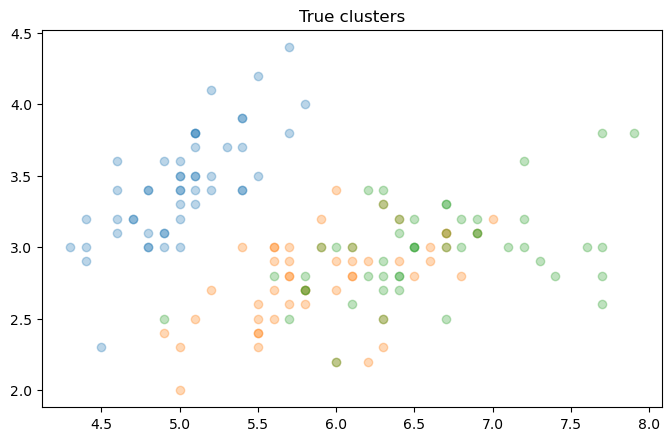

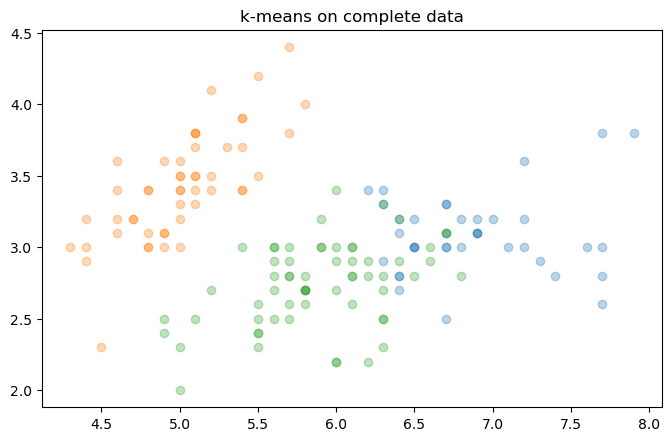

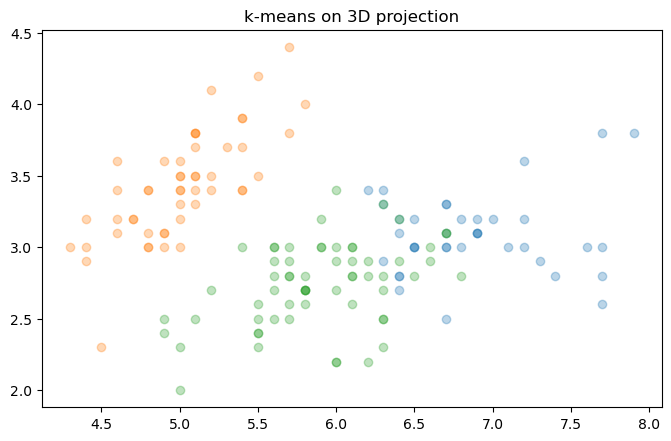

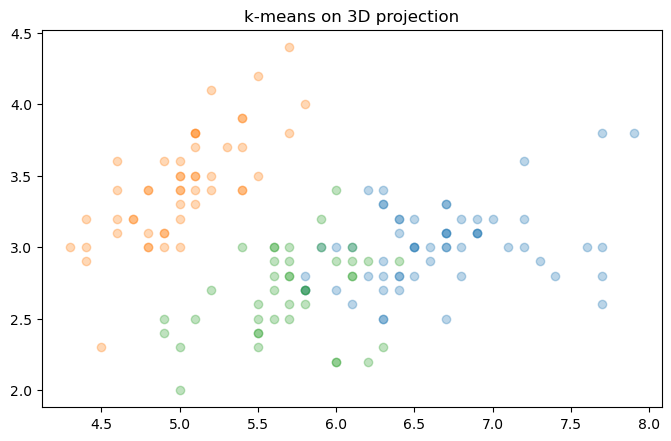

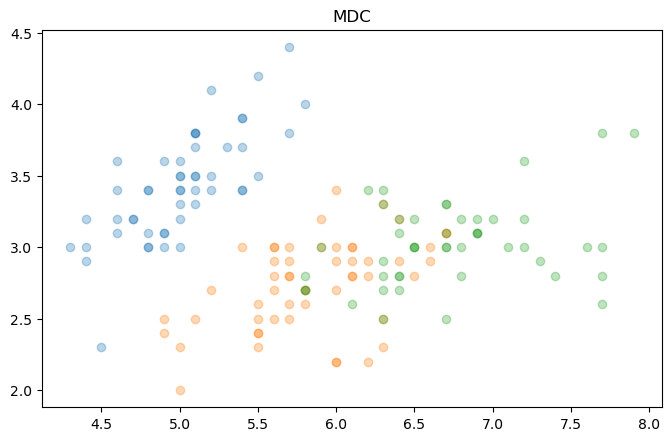

In [6]:
myscripts.cluster_scatter(data,true_indexes,title="True clusters")
myscripts.cluster_scatter(data,kmeans_obj_3.indexes,title="k-means on complete data")
myscripts.cluster_scatter(data,kmeans_obj_3.indexes,title="k-means on 3D projection")
myscripts.cluster_scatter(data,kmeans_obj_2.indexes,title="k-means on 3D projection")
myscripts.cluster_scatter(data,indexes_mdc,title="MDC")